In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn import linear_model, datasets, tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [5]:
pd.options.display.max_rows = 4000

In [6]:
df.dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
position      int64
positin1    float64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
field_cd    float64
undergra     object
mn_sat       object
tuition      object
race        float64
imprace     float64
imprelig    float64
from         object
zipcode      object
income       object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64


In [7]:
df .isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

In [15]:
# Drop the null columns where all values are null

as_Selected = df.loc[(df.match == 1)]


data_age = as_Selected[['age','age_o']]

data_age

,age,age_o
2,21.0,22.0
3,21.0,23.0
4,21.0,24.0
8,21.0,28.0
13,24.0,23.0
18,24.0,28.0
33,23.0,23.0
38,23.0,28.0
43,21.0,23.0
48,21.0,28.0


In [7]:
data_age.isnull().sum()

age      18
age_o    18
dtype: int64

In [8]:
# rename fields

rename_age = data_age.rename(columns={
                            'age_o':  'PartnerAge',
                            'age': 'SubjectAge'
                            
                           })
rename_age

,SubjectAge,PartnerAge
2,21.0,22.0
3,21.0,23.0
4,21.0,24.0
8,21.0,28.0
13,24.0,23.0
18,24.0,28.0
33,23.0,23.0
38,23.0,28.0
43,21.0,23.0
48,21.0,28.0


In [9]:
rename_age.isnull().sum()

SubjectAge    18
PartnerAge    18
dtype: int64

<Figure size 14400x13680 with 0 Axes>

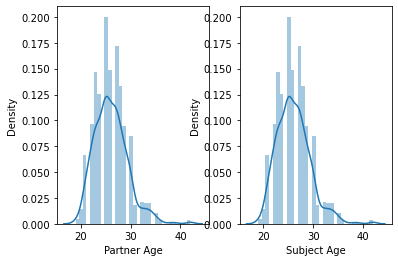

In [10]:
df=pd.DataFrame()
df['Partner Age']=rename_age['PartnerAge']
df['Subject Age']=rename_age['SubjectAge']

plt.figure(figsize = (200,190))
fig, ax =plt.subplots(1,2)
sns.distplot(df['Partner Age'], ax=ax[0])
sns.distplot(df['Subject Age'], ax=ax[1])
fig.show()

In [11]:
#Clean up NAN values

rename_age.dropna()

,SubjectAge,PartnerAge
2,21.0,22.0
3,21.0,23.0
4,21.0,24.0
8,21.0,28.0
13,24.0,23.0
18,24.0,28.0
33,23.0,23.0
38,23.0,28.0
43,21.0,23.0
48,21.0,28.0


In [12]:
#Clean up NAN values

rename_age.fillna(value=rename_age['SubjectAge'].mean(), inplace=True)

rename_age.fillna(value=rename_age['PartnerAge'].mean(), inplace=True)  


In [13]:
#Clean up NAN values

rename_age.fillna(value=rename_age['SubjectAge'].median(), inplace=True)

rename_age.fillna(value=rename_age['PartnerAge'].median(), inplace=True)  


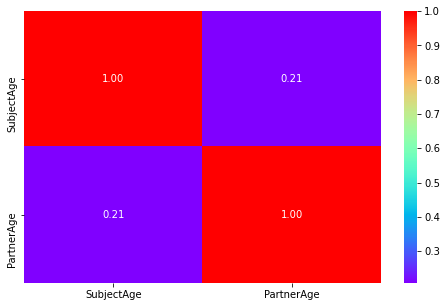

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(rename_age.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

In [15]:
X = rename_age[['PartnerAge','SubjectAge']].values

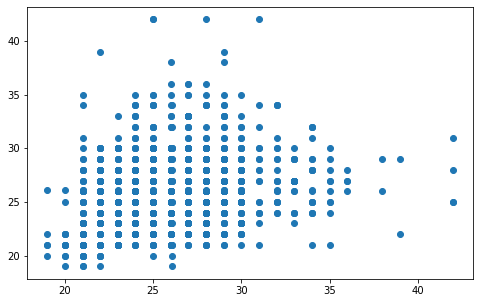

In [16]:
# Plot and show scatter
plt.figure(figsize = (8,5))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [17]:
x = X

In [18]:
# Function define the optimum number of KMean Clusters

def get_wcss(x):
    wcss = []
    for i in range(1,20):
        kmeans = KMeans(n_clusters = i).fit(x)
        wcss.append(kmeans.inertia_)
    return wcss

def plot_elbow_curve(wcss):
    plt.figure(figsize = (8,5))
    plt.plot(range(1,20), wcss, color = 'purple')
    plt.xlabel('Number of clusters')
    plt.ylabel('Within Cluster Sum of Squares (WCSS)')
    plt.title('TESTING THE OPTIMUM NUMBER OF CLUSTERS - KMEANS')
    plt.show()

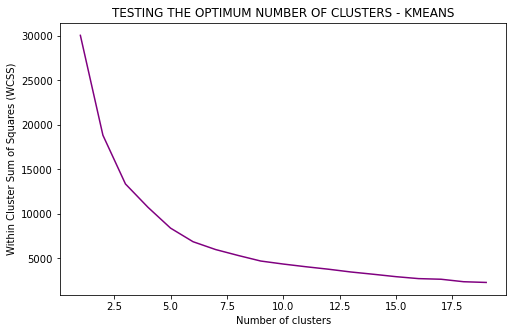

In [19]:
# Get and plot the WCSS for Kmeans applied on Age of Partner vs Age of Subject
wcss = get_wcss(x)
plot_elbow_curve(wcss)

In [20]:
# Create a kmeans model using k = 12

kmeans = KMeans(n_clusters=12)

# Fit the model to the data
kmeans.fit(X)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X)

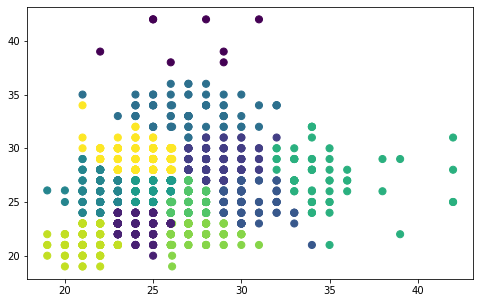

In [21]:
# Plot the clusters
plt.figure(figsize = (8,5))
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [22]:
# Print the cluster centers and cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [23]:
centers

array([[26.875     , 40.25      ],
       [24.23636364, 22.90909091],
       [28.41176471, 28.5620915 ],
       [30.13513514, 25.08524824],
       [27.00217162, 33.43661972],
       [22.18309859, 25.9463765 ],
       [24.92019548, 26.13221366],
       [34.67741935, 27.30769504],
       [27.03067967, 25.17445458],
       [27.53601556, 22.08510638],
       [21.27586207, 21.37931034],
       [24.4997645 , 29.13207547]])

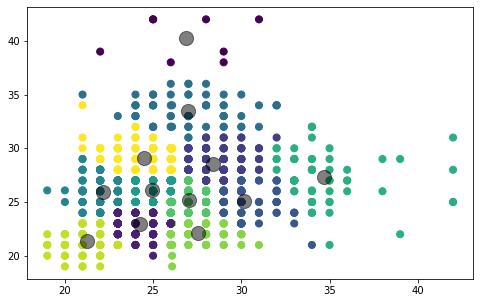

In [24]:
plt.figure(figsize = (8,5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

# Save the Model

In [25]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
KMean_model_age = 'giangcao3.sav'
joblib.dump(KMean_model_age, KMean_model_age)

['giangcao3.sav']